In [1]:
'''NETWORK ANALYSIS - using Scapy'''

'''Using common fields to perform exploratory analysis on PCAP file from 20th Dec 2021'''

# https://notebook.community/dloss/notebooks/NetworkTraffic-Pandas

'Using common fields to perform exploratory analysis on PCAP file from 20th Dec 2021'

In [2]:
# Install dependencies

!pip3 install scapy
from scapy.all import * # Packet manipulation

import pandas as pd # Pandas - Create and Manipulate DataFrames
import numpy as np # Math Stuff
import binascii # Binary to Ascii 
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [3]:
# Read from a historic pcap file
pcap_p = rdpcap("pcap_20_dec.pcap")

<Ether  dst=d6:95:22:3c:83:79 src=dc:ef:ca:a4:55:ff type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=283 id=23558 flags=DF frag=0 ttl=4 proto=udp chksum=0x68f7 src=192.168.0.50 dst=239.255.255.250 |<UDP  sport=1900 dport=1900 len=263 chksum=0x40c5 |<Raw  load='NOTIFY * HTTP/1.1\r\nHOST: 239.255.255.250:1900\r\nNT: upnp:rootdevice\r\nNTS: ssdp:alive\r\nUSN: uuid:2492835748::upnp:rootdevice\r\nCACHE-CONTROL: max-age=1800\r\nSERVER: node.js/10.16.0 UPnP/1.1 node-ssdp/4.0.0\r\nLOCATION: http://192.168.0.50:80/device-desc.xml\r\n\r\n' |>>>>

In [32]:
# pcap_p.summary

In [31]:
# display contents of the 11th packet (index 10)
pkt = pcap_p[20]
pkt

print('\n\n Explore possible sub-layers from the 20th packet using .payload_guess \n\n')
# Extract possible sublayers in packet
pkt.payload_guess



 Explore possible sub-layers from the 20th packet using .payload_guess 




[({'type': 122}, scapy.layers.l2.LLC),
 ({'type': 34928}, scapy.layers.l2.LLC),
 ({'type': 33024}, scapy.layers.l2.Dot1Q),
 ({'type': 34984}, scapy.layers.l2.Dot1AD),
 ({'type': 1}, scapy.layers.l2.Ether),
 ({'type': 2054}, scapy.layers.l2.ARP),
 ({'type': 34980}, scapy.contrib.ethercat.EtherCat),
 ({'type': 2048}, scapy.layers.inet.IP),
 ({'type': 34525}, scapy.layers.inet6.IPv6),
 ({'type': 34958}, scapy.layers.eap.EAPOL),
 ({'dst': '01:80:c2:00:00:03', 'type': 34958}, scapy.layers.eap.EAPOL),
 ({'type': 34915}, scapy.layers.ppp.PPPoED),
 ({'type': 34916}, scapy.layers.ppp.PPPoE),
 ({'type': 32801}, scapy.layers.ppp.PPP_IPCP),
 ({'type': 32851}, scapy.layers.ppp.PPP_ECP),
 ({'type': 35033}, scapy.layers.lltd.LLTD),
 ({'type': 41197}, scapy.layers.sixlowpan.SixLoWPAN)]

In [25]:
# '''helpful commands'''

# View list of all commands in Scapy. Popular commands are: send(), sniff() etc.
# lsc()

# View list of useful methods for Scapy packet objects
# dir(pkt)

# View Fields and default values of each layer (any protocol)
# print('Ether: ')
# print(ls(Ether))
# print('\n ------------------------')
# print('IP: ')
# print(ls(IP))
# print('\n ------------------------')
# print('UDP: ')
# print(ls(UDP))
# print('\n ------------------------')
# print('TCP: ')
# print(ls(TCP))
# print('\n ------------------------')

# View protocol fields of the chosen packet. (Note that the text in parenthesis refers to default values of any given packet).
# Lists data link, network, transport,application layers of packet

# ls(pkt)
# print('\n ------------------------')

# pkt.show()
# print('\n ------------------------')

# print('Eth Dst: ', pkt[Ether].dst)
# print('IP Dst: ', pkt[IP].dst)
# print('Eth Src, Eth Dst, IP Src, IP Dst: ', pkt.sprintf("%Ether.src% > %Ether.dst% \n %IP.src% > %IP.dst%"))
# print('TCP flags, TCP dport: ', pkt.sprintf("%TCP.flags% %TCP.dport%"))

In [24]:
''' https://github.com/secdevopsai/Packet-Analytics/blob/master/Packet-Analytics.ipynb '''

'''Explore the packet list'''
print('\n\n Explore the packet list from the 20th packet\n\n')
# To retrieving a single item from packet list
# .payload method is a pointer to the next layer

ethernet_frame = pcap_p[20]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload # Retrieve payload that comes after layer 4


# Observe that we just popped off previous layer header
print('Ethernet frame summary: ', ethernet_frame.summary())
print('\n ------------------------ \n')
print('IP Packet summary: ',ip_packet.summary())
print('\n ------------------------ \n')
print('Segment summary: ',segment.summary())
print('\n ------------------------ \n')
print('Data summary: ',data.summary()) # If blank, empty object
print('\n ------------------------ \n')


# Complete depiction of packet
## Achieving understanding that these are the fields will enable the ability 
## to ask the data more meaningful questions ie) type of layer 4 segment is defined in layer 3 packet

print('Packet Description: \n')

ethernet_frame.show()




 Explore the packet list from the 20th packet


Ethernet frame summary:  Ether / IP / UDP 192.168.0.50:1900 > 239.255.255.250:1900 / Raw

 ------------------------ 

IP Packet summary:  IP / UDP 192.168.0.50:1900 > 239.255.255.250:1900 / Raw

 ------------------------ 

Segment summary:  UDP 192.168.0.50:1900 > 239.255.255.250:1900 / Raw

 ------------------------ 

Data summary:  Raw

 ------------------------ 

Packet Description: 

###[ Ethernet ]### 
  dst       = d6:95:22:3c:83:79
  src       = dc:ef:ca:a4:55:ff
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 283
     id        = 23558
     flags     = DF
     frag      = 0
     ttl       = 4
     proto     = udp
     chksum    = 0x68f7
     src       = 192.168.0.50
     dst       = 239.255.255.250
     \options   \
###[ UDP ]### 
        sport     = 1900
        dport     = 1900
        len       = 263
        chksum    = 0x40c5
###[ Raw ]### 
           load      = '

In [26]:
# '''Importing layers in Scapy'''

# # Packets can be filtered on layers ie) ethernet_frame[scapy.layers.l2.Ether]
# ethernet_type = type(ethernet_frame)
# ip_type = type(ip_packet)
# tcp_type = type(segment)

# print("Ethernet", pcap_p[ethernet_type])
# print("IP", pcap_p[ip_type])
# print("TCP", pcap_p[tcp_type])
# print('\n ------------------------ \n')

# # Scapy provides the same functionality via import statements
# from scapy.layers.l2 import Ether
# from scapy.layers.inet import IP
# from scapy.layers.inet import TCP, UDP

# print("Ether",  pcap_p[Ether])
# print("IP",  pcap_p[IP])
# print("UDP",  pcap_p[UDP])
# print("TCP",  pcap_p[TCP])

In [9]:
'''Use PlotLy to plot graphs'''

# Install Dependencies:

!pip install plotly

from scapy.layers.inet import IP
from datetime import datetime

import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special

py.offline.init_notebook_mode(connected=True)

In [10]:
''' Use networkx to visualise network maps'''

!pip install networkx
import networkx as nx

 

 network map 




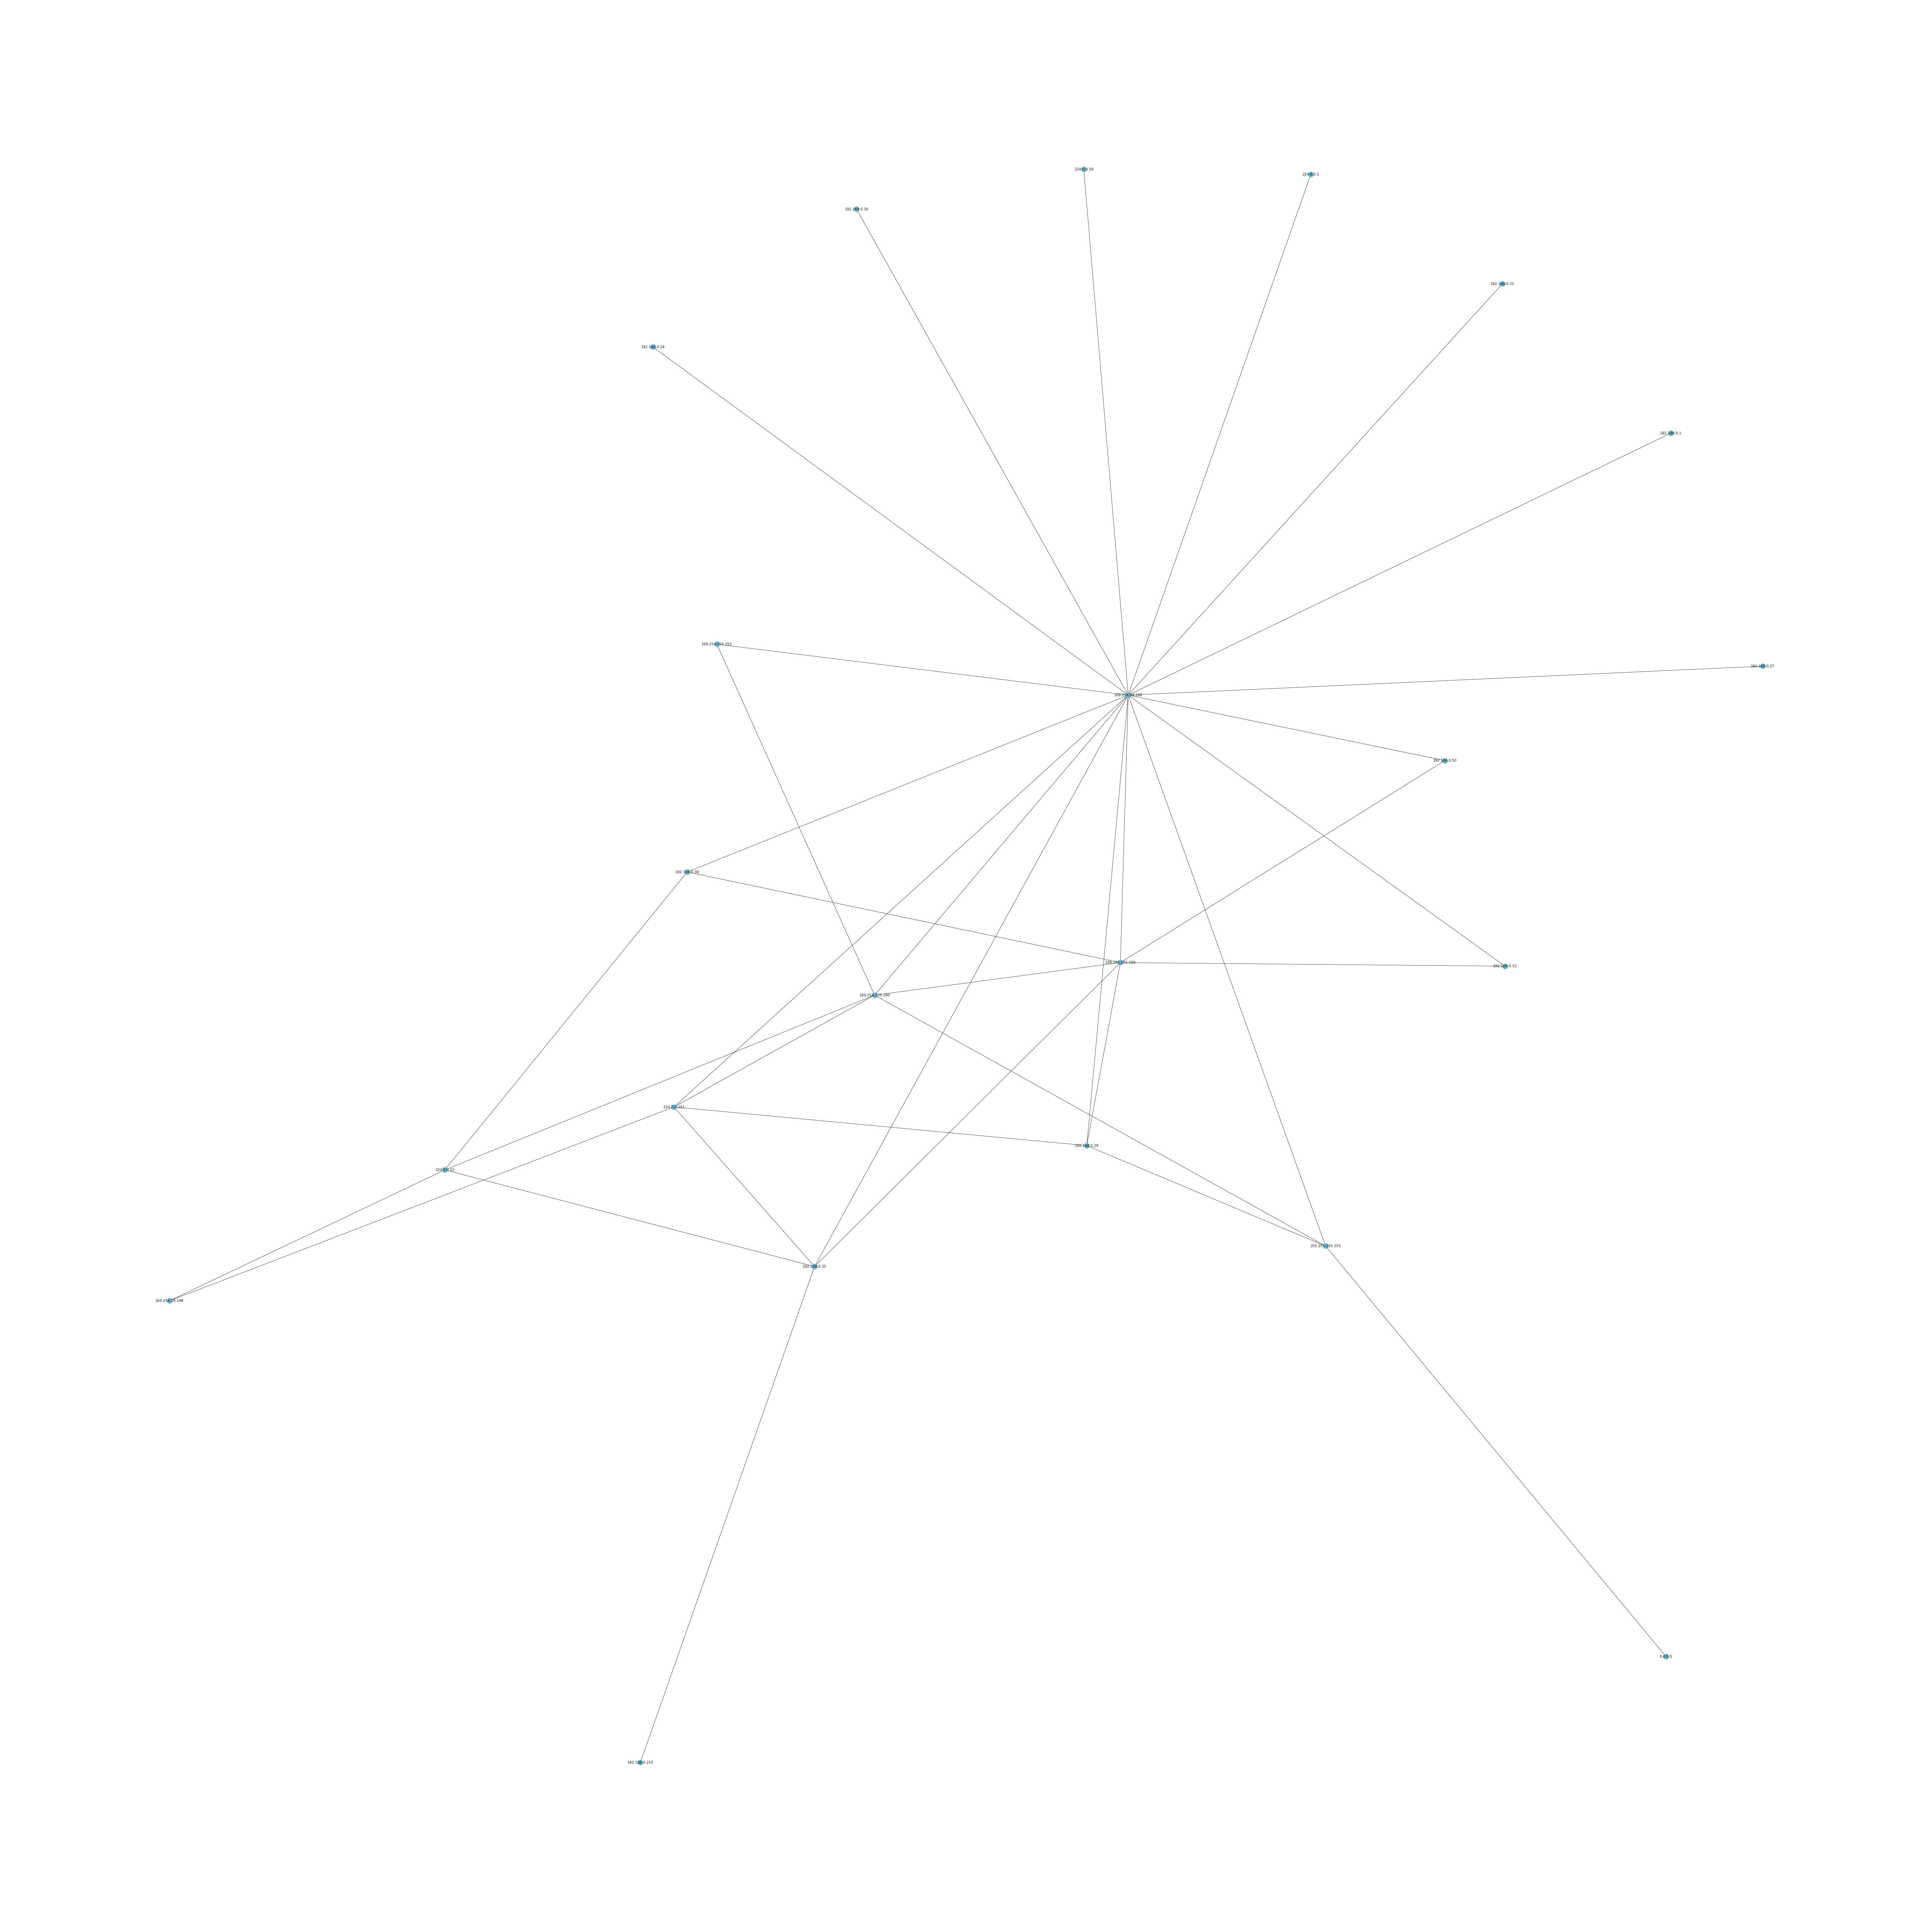

In [33]:
# Create a network map
print(' \n\n network map \n\n')
G = nx.Graph()
connections = set()
nodes = set()
with PcapReader("pcap_20_dec.pcap") as pcap_reader:
    for p in pcap_reader:
        if IP in p:
            nodes.add(p[IP].src)
            nodes.add(p[IP].dst)
            connections.add((p[IP].src, p[IP].dst))
G.add_nodes_from(nodes)
G.add_edges_from(connections)
plt.rcParams['figure.figsize'] = 90, 90
pos = nx.spring_layout(G, scale=1.0, iterations=100)
nx.draw(G, pos, node_color='c',edge_color='k', with_labels=True)
plt.savefig( 'NetworkMap.png' )



 Total times each source IP address interacts in network data 


+-----------------+-------+
|        IP       | Count |
+-----------------+-------+
|  169.254.94.190 | 55588 |
|     0.0.0.0     | 14961 |
|   192.168.0.50  | 13827 |
|   192.168.0.30  |  3144 |
|   192.168.0.32  |  3132 |
|   192.168.0.27  |  3128 |
|   192.168.0.38  |  2943 |
| 169.254.135.180 |  715  |
|   192.168.0.33  |  150  |
|  169.254.19.198 |  103  |
|   192.168.0.29  |   98  |
|   192.168.0.35  |   14  |
+-----------------+-------+


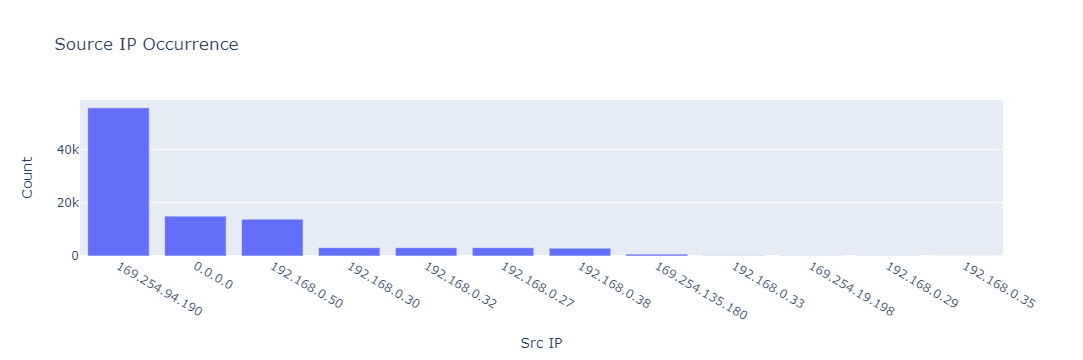

In [34]:
'''Find the total times each source IP address interacts in network data'''
print('\n\n Total times each source IP address interacts in network data \n\n')

# from scapy.all import *
from collections import Counter
from prettytable import PrettyTable
# from scapy.layers.inet import IP

srcIP=[]

for pkt in pcap_p:
    if IP in pkt:
        try:
            srcIP.append(pkt[IP].src)
        except:
            pass
        
cnt=Counter()
for ip in srcIP:
    cnt[ip] += 1
    
table= PrettyTable(["IP", "Count"])

for ip, count in cnt.most_common():
   table.add_row([ip, count])
f = open("output.txt", "w")
f.write(str(table))
f.close()
print(table)



'''Plot total occurrences of IPs in network data'''

# from scapy.all import *
# from collections import Counter
# import plotly
from scapy.layers.inet import IP, UDP, Ether

srcIP=[]
for pkt in pcap_p:
    if IP in pkt:
        try:
           srcIP.append(pkt[IP].src)
        except:
            pass
cnt=Counter()

for ip in srcIP:
    cnt[ip] += 1
xData=[]
yData=[]
for ip, count in cnt.most_common():
    xData.append(ip)
    yData.append(count)

plotly.offline.iplot(
    {"data":[plotly.graph_objs.Bar(x=xData, y=yData)],
     "layout":plotly.graph_objs.Layout(
         title="Source IP Occurrence",
         xaxis=dict(title="Src IP"),
         yaxis=dict(title="Count")
     )
    }
)



 Total Bytes sent by source Ip addresses 




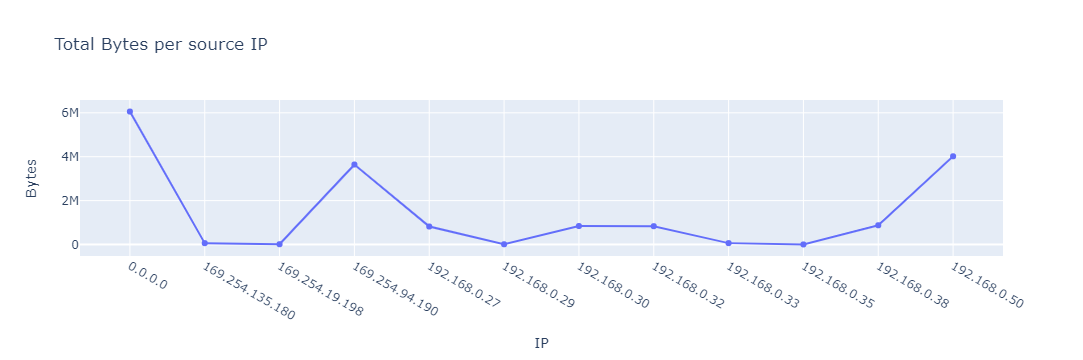

In [35]:
''' Find total Bytes sent by source Ip addresses '''
print('\n\n Total Bytes sent by source Ip addresses \n\n')

#Lists to hold packet info
pktBytes=[]
pktIPs=[]

#Read each packet and append to the lists.
for pkt in pcap_p:
    if IP in pkt:
        try:
            pktBytes.append(pkt[IP].len)
            pktIPs.append(pkt[IP].src)
        except:
            pass
        
#This converts list to series
bytes = pd.Series(pktBytes).astype(int)

ips = pd.Series(pktIPs).astype(str)

#Create the dataframe
df  = pd.DataFrame({"Bytes": bytes, "IP":ips})

# Display the total 
df.groupby(['IP'])['Bytes'].agg('sum')



''' Plot total Bytes sent by source Ip addresses using plotly '''

layout = go.Layout(
    title="Total Bytes per source IP ",
    xaxis=dict(
        title="IP"
    ),
    yaxis=dict(
        title="Bytes"
    )
)

dfg = df.groupby(['IP'])['Bytes'].agg('sum')

Trace1= go.Scatter(
    x=dfg.index, 
    y=dfg
)

fig=go.Figure(data=[Trace1], layout=layout)
py.offline.iplot(fig)

In [37]:
''' MAP source IP addresses to MAC addresses'''
print('\n\n MAP source IP addresses to MAC addresses (with total Bytes) \n\n')
    
#Lists to hold packet info
pktBytes=[]
pktMACs=[]
pktIPs=[]

#Read each packet and append to the lists.
for pkt in pcap_p:
    if Ether in pkt:
        try:
            pktBytes.append(pkt[IP].len)
            pktIPs.append(pkt[IP].src)
            pktMACs.append(pkt[Ether].src)
        except:
            pass
        
#This converts list to series
bytes = pd.Series(pktBytes).astype(int)
IPs = pd.Series(pktIPs).astype(str)
macs = pd.Series(pktMACs).astype(str)

#Create the dataframe
df  = pd.DataFrame({"Bytes": bytes, "IPs":IPs, "MAC":macs})
# print(df)


# https://www.stackvidhya.com/pretty-print-dataframe/
# table= PrettyTable(["MAC", "IP", "Bytes"])
# print(table)

# Display the total 
df.groupby(['MAC', 'IPs'])['Bytes'].agg('sum')




 MAP source IP addresses to MAC addresses (with total Bytes) 




MAC                IPs            
00:31:92:e1:a4:29  192.168.0.30        841168
00:31:92:e1:a4:55  192.168.0.27        818974
00:31:92:e1:a9:4f  192.168.0.32        833628
0c:2a:69:1e:d7:23  0.0.0.0            1681680
10:96:93:55:45:28  192.168.0.29         10211
28:6d:97:73:d6:fc  0.0.0.0            2511936
2a:b8:7a:e0:54:ae  0.0.0.0               1312
2c:71:ff:92:bb:56  0.0.0.0            1589816
2e:f6:f1:b6:1e:43  0.0.0.0             125430
                   169.254.19.198       11989
9c:da:3e:ff:df:5c  0.0.0.0                700
                   192.168.0.35          1578
9e:fd:b6:fc:62:a8  0.0.0.0               4788
ac:74:b1:3f:2a:e6  0.0.0.0               9184
                   169.254.135.180      60488
d4:d2:d6:bc:ac:e5  192.168.0.33         62000
d6:95:22:3c:83:79  0.0.0.0             133209
                   169.254.94.190     3644695
dc:ef:ca:a4:55:ff  192.168.0.50       4019008
ec:b5:fa:84:f8:f1  192.168.0.38        875786
Name: Bytes, dtype: int64



 Total Bytes sent by source MAC addresses 




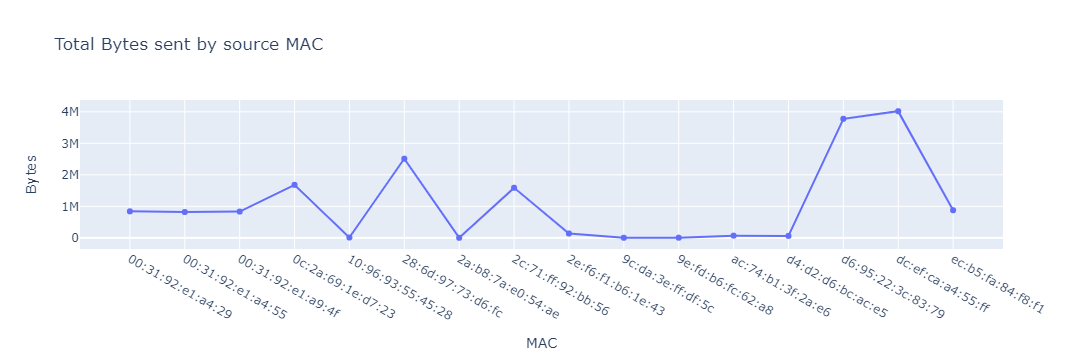

In [38]:
''' Plot total Bytes sent by source MAC addresses using plotly '''
print('\n\n Total Bytes sent by source MAC addresses \n\n')

layout = go.Layout(
    title="Total Bytes sent by source MAC ",
    xaxis=dict(
        title="MAC"
    ),
    yaxis=dict(
        title="Bytes"
    )
)

dfg = df.groupby(['MAC'])['Bytes'].agg('sum')

Trace1= go.Scatter(
    x=dfg.index, 
    y=dfg
)

fig=go.Figure(data=[Trace1], layout=layout)
py.offline.iplot(fig)

In [43]:
''' Find who the top MAC addresses are speaking to: '''

# Read each packet and append to the list.
pktMAC=[]
for pkt in pcap_p:
    if IP in pkt:
        if str(pkt[Ether].src)=='d6:95:22:3c:83:79':
        # if str(pkt[Ether].src)=='dc:ef:ca:a4:55:ff':
            pktMAC.append(pkt.sprintf("MAC destination = %Ether.dst%"))
            # pktMAC.append(pkt.sprintf("IP destination = %IP.dst%"))
        else:
            pass
        
        (pkt.sprintf("UDP.Length= %UDP.len%"))
from collections import Counter 
count = Counter(pktMAC)

from pprint import pprint
print('\n\n Who is ' + str(pkt[Ether].src) + ' speaking to, and how frequently? \n\n')
pprint(count)




 Who is d6:95:22:3c:83:79 speaking to, and how frequently? 


Counter({'MAC destination = 78:98:e8:3a:dc:c6': 24134,
         'MAC destination = ec:b5:fa:84:f8:f1': 12878,
         'MAC destination = 00:31:92:e1:a4:29': 4212,
         'MAC destination = 00:31:92:e1:a9:4f': 4194,
         'MAC destination = 00:31:92:e1:a4:55': 4194,
         'MAC destination = ff:ff:ff:ff:ff:ff': 2488,
         'MAC destination = 50:ec:50:ee:1d:f5': 921,
         'MAC destination = dc:ef:ca:a4:55:ff': 893,
         'MAC destination = d6:95:22:3c:83:79': 794,
         'MAC destination = 01:00:5e:7f:ff:fa': 767,
         'MAC destination = d4:d2:d6:bc:ac:e5': 172,
         'MAC destination = ac:74:b1:3f:2a:e6': 144,
         'MAC destination = 10:96:93:55:45:28': 54,
         'MAC destination = 01:00:5e:00:00:32': 38,
         'MAC destination = 01:00:5e:00:00:01': 38,
         'MAC destination = 01:00:5e:00:00:fb': 16,
         'MAC destination = 9c:da:3e:ff:df:5c': 12})


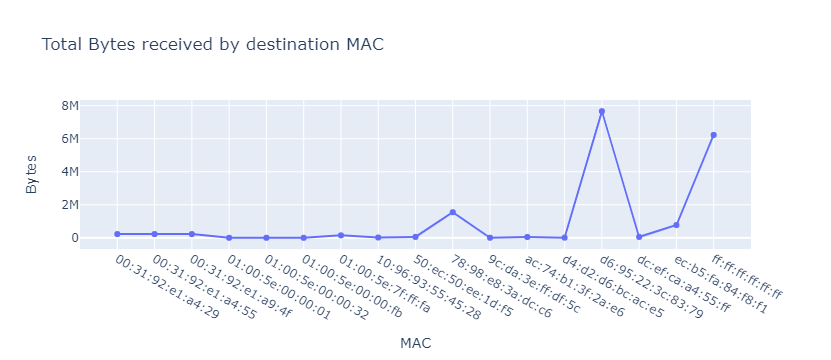

In [18]:
''' Find total Bytes received by MAC addresses '''

#Lists to hold packet info
pktBytes=[]
pktMACs=[]


#Read each packet and append to the lists.
for pkt in pcap_p:
    if Ether in pkt:
        try:
            pktBytes.append(pkt[IP].len)
            pktMACs.append(pkt[Ether].dst)
        except:
            pass
  
#This converts list to series
bytes = pd.Series(pktBytes).astype(int)

macs = pd.Series(pktMACs).astype(str)

#Create the dataframe
df  = pd.DataFrame({"Bytes": bytes, "Eth":macs})

# Display the total 
df.groupby(['Eth'])['Bytes'].agg('sum')


''' Plot total Bytes sent by source Ip addresses using plotly '''

layout = go.Layout(
    title="Total Bytes received by destination MAC ",
    xaxis=dict(
        title="MAC"
    ),
    yaxis=dict(
        title="Bytes"
    )
)

dfg = df.groupby(['Eth'])['Bytes'].agg('sum')

Trace1= go.Scatter(
    x=dfg.index, 
    y=dfg
)


fig=go.Figure(data=[Trace1], layout=layout)
py.offline.iplot(fig)

/tmp/ipykernel_461/1284137673.py:13: DeprecationWarning:

an integer is required (got type EDecimal).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.



                     Bytes
Times                     
2021-12-20 16:43:52     60
2021-12-20 16:43:54     60
2021-12-20 16:43:56   1730
2021-12-20 16:43:58    178
2021-12-20 16:44:00    314
...                    ...
2021-12-20 23:08:14     60
2021-12-20 23:08:16    446
2021-12-20 23:08:18   1254
2021-12-20 23:08:20    789
2021-12-20 23:08:22   3514

[11536 rows x 1 columns]


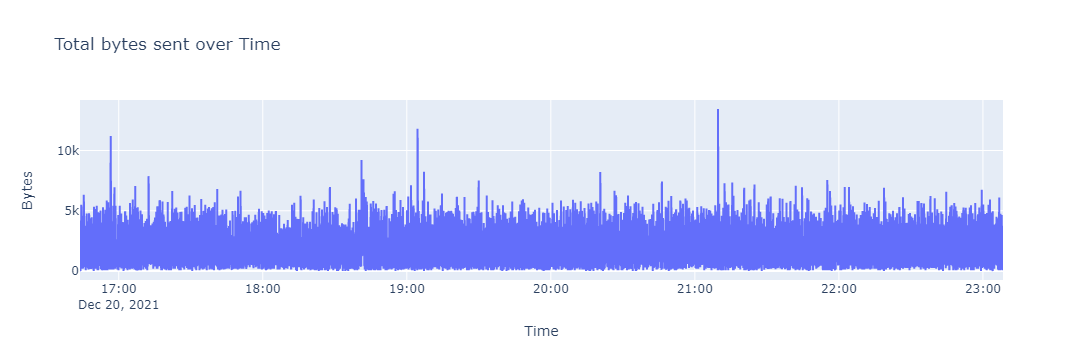

In [44]:
''' Create a graph to plot Bytes sent over Time '''

#Lists to hold packet info
pktBytes=[]
pktTimes=[]


#Read each packet and append to the lists.
for pkt in pcap_p:
    if IP in pkt:
        try:
            pktBytes.append(pkt[IP].len)
            pktTime=datetime.fromtimestamp(pkt.time)
            pktTimes.append(pktTime.strftime("%Y-%m-%d %H:%M:%S.%f"))

        except:
            pass
#This converts list to series
bytes = pd.Series(pktBytes).astype(int)


#Convert the timestamp list to a pd date_time
times = pd.to_datetime(pd.Series(pktTimes).astype(str),  errors='coerce')


#Create the dataframe
df  = pd.DataFrame({"Bytes": bytes, "Times":times})


#set the date from a range to an timestamp
df = df.set_index('Times')


#Create a new dataframe of 2 second sums to pass to plotly
df2=df.resample('2S').sum()
df2 = pd.DataFrame(data=df2)
print(df2)

        
'''Create The Graph using plotly'''

layout = go.Layout(
    title="Total bytes sent over Time ",
    xaxis=dict(
        title="Time"
    ),
    yaxis=dict(
        title="Bytes"
    )
)

Trace1= go.Scatter(
    x=df2.index, 
    y=df2['Bytes']
)

fig=go.Figure(data=[Trace1], layout=layout)
py.offline.iplot(fig) 


In [45]:
'''Extract packets during peaktimes'''
print('\n\n Extract packets during peaktimes, e.g. at 2021-12-20 21:09:38 \n\n')
# Example at: 21:09:38

count=1
for pkt in pcap_p:
    if str(datetime.fromtimestamp(pkt.time))=='2021-12-20 21:09:38':
        print('------------------------ ')
        print('Packet',count)
        print(pkt.sprintf("This is a{TCP: TCP}{UDP: UDP}{ICMP:n ICMP}{ARP: ARP} packet"))
        pkt.show()
        count=count+1
        
print('total packets =', count)



 Extract packets during peaktimes, e.g. at 2021-12-20 21:09:38 




/tmp/ipykernel_461/2636244091.py:7: DeprecationWarning:

an integer is required (got type EDecimal).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.



------------------------ 
Packet 1
This is a ARP packet
###[ Ethernet ]### 
  dst       = ff:ff:ff:ff:ff:ff
  src       = d6:95:22:3c:83:79
  type      = ARP
###[ ARP ]### 
     hwtype    = 0x1
     ptype     = IPv4
     hwlen     = 6
     plen      = 4
     op        = who-has
     hwsrc     = d6:95:22:3c:83:79
     psrc      = 169.254.94.190
     hwdst     = 00:00:00:00:00:00
     pdst      = 192.168.0.40

------------------------ 
Packet 2
This is a UDP packet
###[ Ethernet ]### 
  dst       = d6:95:22:3c:83:79
  src       = dc:ef:ca:a4:55:ff
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 283
     id        = 47539
     flags     = DF
     frag      = 0
     ttl       = 4
     proto     = udp
     chksum    = 0xb4a
     src       = 192.168.0.50
     dst       = 239.255.255.250
     \options   \
###[ UDP ]### 
        sport     = 1900
        dport     = 1900
        len       = 263
        chksum    = 0x40c5
###[ Raw ]###

In [46]:
# '''Extract packets during peaktimes'''
# # # 16:56:38, 19:04:30, 21:09:38


# # Read each packet and append to the list.
# pktPayload=[]
# for pkt in pcap_p:
#         if str(datetime.fromtimestamp(pkt.time))=='2021-12-20 21:09:38':
#             pktPayload.append('----------------------------------------')
#             pktPayload.append(len(pkt))
#             pktPayload.append(pkt.sprintf("IP.Length= %IP.len%"))
#             pktPayload.append(pkt.sprintf("UDP.Length= %UDP.len%"))
#             pktPayload.append(pkt.sprintf("This is a{TCP: TCP}{UDP: UDP}{ICMP:n ICMP}{ARP: ARP} packet"))
#             pktPayload.append(pkt.payload)
#             # pktPayload.append(pkt.show())
#         else:
#             pass
        
# from pprint import pprint
# pprint(pktPayload, indent=1)


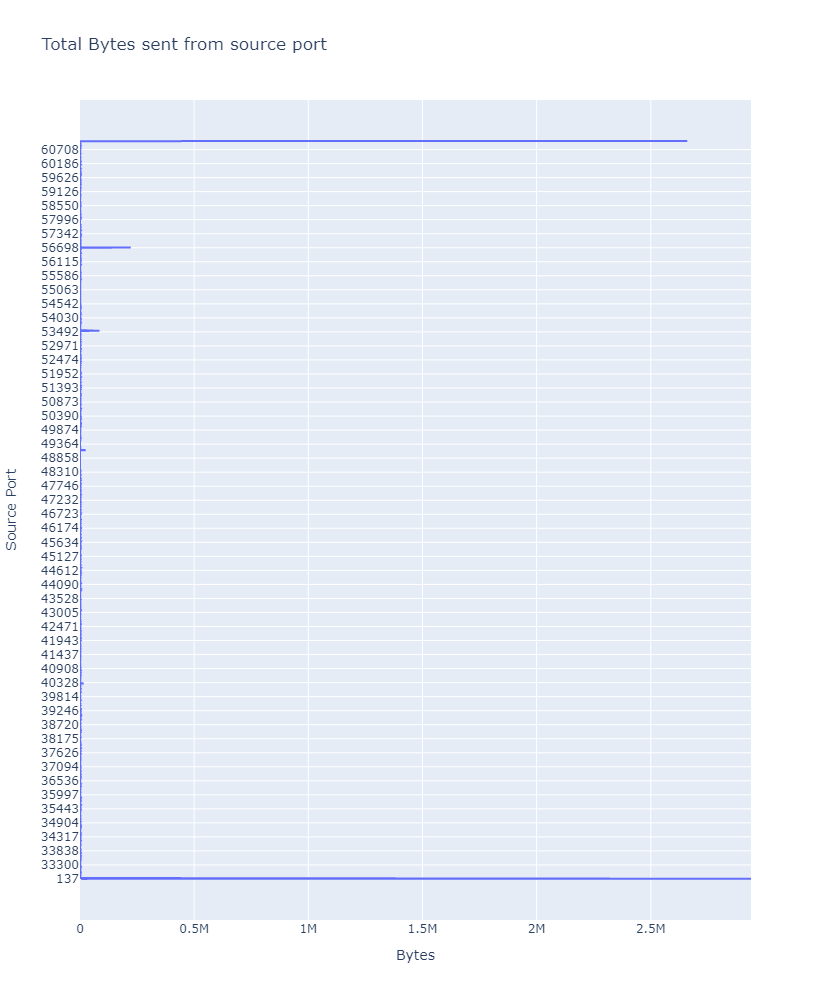

In [22]:
''' Find total payload send by source ports '''

#Lists to hold packet info
pktBytes=[]
pktSPort=[]

#Read each packet and append to the lists.
for pkt in pcap_p:
    if IP in pkt:
        try:
            pktBytes.append(len(pkt.payload))
            pktSPort.append(pkt[IP].sport)
        except:
            pass
        
#This converts list to series
bytes = pd.Series(pktBytes).astype(int)

sport = pd.Series(pktSPort).astype(str)

#Create the dataframe
df  = pd.DataFrame({"Bytes": bytes, "Source Port":sport})

# Display the total 
df.groupby(['Source Port'])['Bytes'].agg('sum')


''' Plot total Bytes sent by source ports using plotly '''

layout = go.Layout(
    height = 1000,
    title="Total Bytes sent from source port ",
    xaxis=dict(
        title="Bytes"
    ),
    yaxis=dict(
        title="Source Port"
    )
)

dfg = df.groupby(['Source Port'])['Bytes'].agg('sum')

Trace1= go.Scatter(
    y=dfg.index, 
    x=dfg,
    orientation='h'
)

fig=go.Figure(data=[Trace1], layout=layout)
py.offline.iplot(fig)

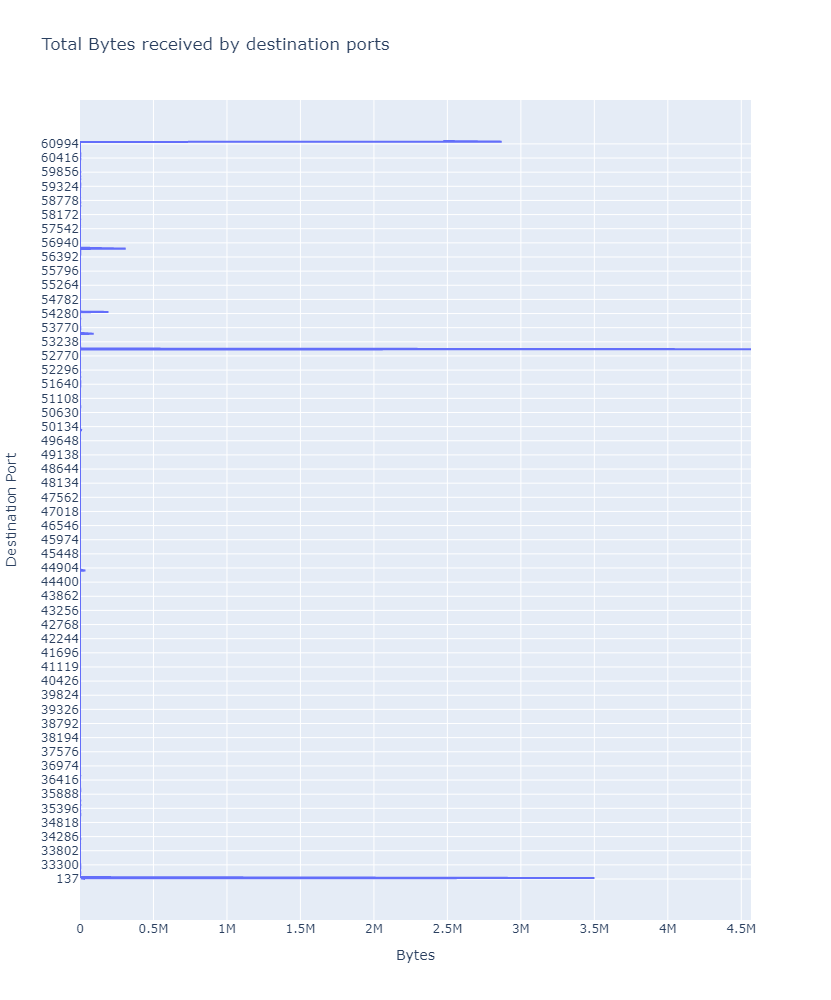

In [23]:
''' Find total payload received by destination ports '''

#Lists to hold packet info
pktBytes=[]
pktDPort=[]

#Read each packet and append to the lists.
for pkt in pcap_p:
    if IP in pkt:
        try:
            pktBytes.append(len(pkt))
            pktDPort.append(pkt[IP].dport)
        except:
            pass
        
#This converts list to series
bytes = pd.Series(pktBytes).astype(int)

dport = pd.Series(pktDPort).astype(str)

#Create the dataframe
df  = pd.DataFrame({"Bytes": bytes, "Destination Port":dport})

# Display the total 
df.groupby(['Destination Port'])['Bytes'].agg('sum')


''' Plot total Bytes received by destination ports using plotly '''

layout = go.Layout(
    height = 1000,
    # margin=go.Margin(l=300),
    title="Total Bytes received by destination ports",
    xaxis=dict(
        title="Bytes"
    ),
    yaxis=dict(
        title="Destination Port"
    ),
)

dfg = df.groupby(['Destination Port'])['Bytes'].agg('sum')

Trace1= go.Scatter(
    y=dfg.index, 
    x=dfg,
    orientation='h'
)

fig=go.Figure(data=[Trace1], layout=layout)
py.offline.iplot(fig)


In [ ]:
# Find which countries/destination information is going to